## Inicialización

In [2]:
# importaciones y demás
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import sympy as sp
import scipy.signal as sg
np.seterr(all='ignore')
import skdsp.signal.discrete as ds
plt.rcParams['text.usetex'] = True## Inicialización

In [29]:
# widgets
ampSlider1 = widgets.FloatSlider(value=1, min=-2, max=2, description=r'\(A\):')
freqSlider1 = widgets.FloatSlider(value=0, min=-1, max=1, step=0.01, description=r'\(\omega/\pi\):')
phaseSlider1 = widgets.FloatSlider(value=0, min=-1, max=1, step=0.01, description=r'\(\phi/\pi\):')
ampSlider2 = widgets.FloatSlider(value=1, min=-2, max=2, description=r'\(A\):')
freqSlider2 = widgets.FloatSlider(value=0, min=-1, max=1, step=0.01, description=r'\(\omega/\pi\):')
phaseSlider2 = widgets.FloatSlider(value=0, min=-1, max=1, step=0.01, description=r'\(\phi/\pi\):')
envCheck1 = widgets.Checkbox(value=False, description='envolvente:')
envCheck2 = widgets.Checkbox(value=False, description='envolvente:')
envCheck3 = widgets.Checkbox(value=False, description=' envolvente suma:')
slHBox1 = widgets.HBox([envCheck1, ampSlider1, freqSlider1, phaseSlider1])
slHBox2 = widgets.HBox([envCheck2, ampSlider2, freqSlider2, phaseSlider2])

## 1.- Una sinusoide

<IPython.core.display.Javascript object>


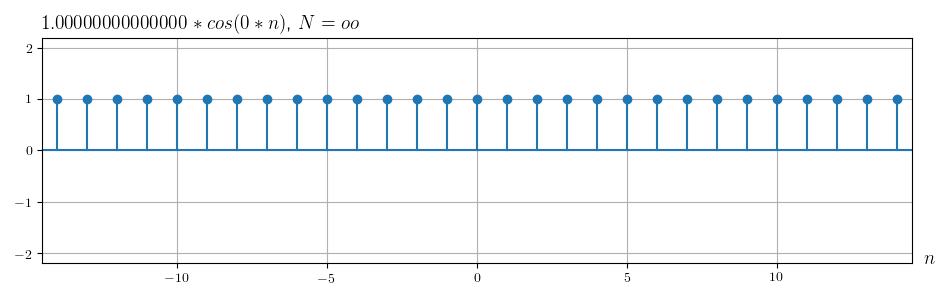

In [30]:
# Una sinusoide
npts = 15
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl0 = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
ne = np.arange(-npts-1, npts+1, 0.01)
pl1 = plt.plot(ne, np.zeros_like(ne), 'C0', lw=1)
pl1[0].set_visible(False)
plt.axis([-npts+0.5, npts-0.5, -2.2, 2.2])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)

def s1():
    s = ds.Sinusoid(ampSlider1.value, sp.S.Pi*freqSlider1.value, sp.S.Pi*phaseSlider1.value)  
    ys = s[ns]
    pl0[0].set_ydata(ys)
    for k in range(len(ns)):
        pl0[1][k].set_ydata([0, ys[k]])
    pl1[0].set_visible(envCheck1.value)
    if envCheck1.value:
        ye = s.eval(ne, True)
        pl1[0].set_ydata(ye)
    plt.title(sp.latex(s, mode='inline') + r', $N = {0}$'.format(s.period), loc='left', size=14)
    
def s1change(change):
    s1()

for w in slHBox1.children:
    w.unobserve_all()
    w.observe(s1change, names='value')
s1()
display(widgets.VBox([slHBox1]))


## 2.- Dos sinusoides

<IPython.core.display.Javascript object>


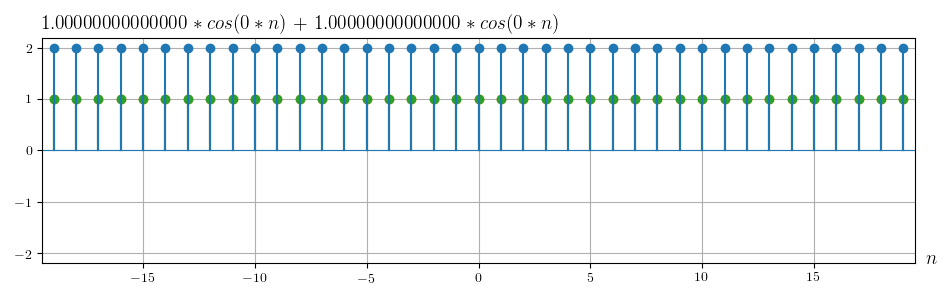

In [31]:
# Dos sinusoides
npts = 20
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl1 = plt.stem(ns, np.zeros(2*npts+1), linefmt='C1-', basefmt='None', markerfmt='oC1')
pl2 = plt.stem(ns, np.zeros(2*npts+1), linefmt='C2-', basefmt='None', markerfmt='oC2')
pls = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
pls[2].set_lw(0.8)
ne = np.arange(-npts-1, npts+1, 0.01)
ple1 = plt.plot(ne, np.zeros_like(ne), 'C1', lw=0.8)
ple1[0].set_visible(False)
ple2 = plt.plot(ne, np.zeros_like(ne), 'C2', lw=0.8)
ple2[0].set_visible(False)
ples = plt.plot(ne, np.zeros_like(ne), 'C0', lw=0.8)
ples[0].set_visible(False)
plt.axis([-npts+0.5, npts-0.5, -2.2, 2.2])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)
ampSlider1.min = 0
ampSlider1.max = 1
ampSlider2.min = 0
ampSlider2.max = 1

def s2():
    s1 = ds.Sinusoid(ampSlider1.value, sp.S.Pi*freqSlider1.value, sp.S.Pi*phaseSlider1.value)
    s2 = ds.Sinusoid(ampSlider2.value, sp.S.Pi*freqSlider2.value, sp.S.Pi*phaseSlider2.value)

    y1 = s1[ns]
    pl1[0].set_ydata(y1)
    for k in range(len(ns)):
        pl1[1][k].set_ydata([0, y1[k]])

    ple1[0].set_visible(envCheck1.value)
    ye1 = s1.eval(ne, True)
    if envCheck1.value:
        ple1[0].set_ydata(ye1)
    
    y2 = s2[ns]
    pl2[0].set_ydata(y2)
    for k in range(len(ns)):
        pl2[1][k].set_ydata([0, y2[k]])
    
    ple2[0].set_visible(envCheck2.value)
    ye2 = s2.eval(ne, True)
    if envCheck2.value:
        ple2[0].set_ydata(ye2)
    
    pls[0].set_ydata(y1 + y2)
    for k in range(len(ns)):
        pls[1][k].set_ydata([0, y1[k] + y2[k]])
    
    ples[0].set_visible(envCheck3.value)
    if envCheck3.value:
        ples[0].set_ydata(ye1 + ye2)
    
    plt.title(sp.latex(s1, mode='inline') + ' + ' + sp.latex(s2, mode='inline'), loc='left', size=14)   
    
def s2change(change):
    s2()

for w in slHBox1.children:
    w.unobserve_all()
    w.observe(s2change, names='value')
for w in slHBox2.children:
    w.unobserve_all()
    w.observe(s2change, names='value')
envCheck3.unobserve_all()
envCheck3.observe(s2change, names='value')
s2()
display(widgets.VBox([slHBox1, slHBox2, envCheck3]))

## 3.- Componentes en fase y cuadratura

<IPython.core.display.Javascript object>


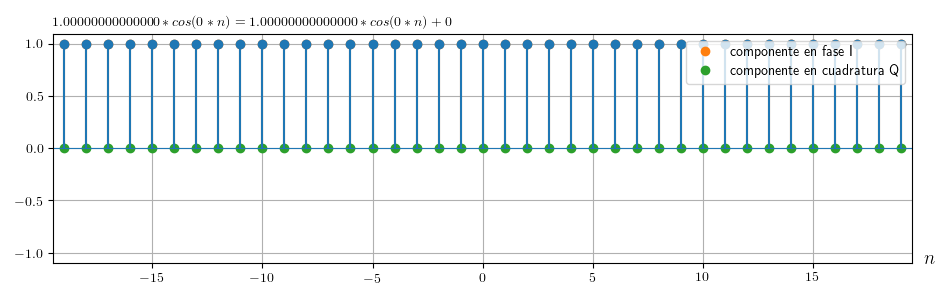

In [32]:
# Componentes en fase y cuadratura
IButton = widgets.ToggleButton(value=True, description='(I) en fase', disabled=False, button_style='info')
QButton = widgets.ToggleButton(value=True, description='(Q) en cuadratura', disabled=False, button_style='info')
IQBox = widgets.HBox([IButton, QButton])

npts = 20
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
plI = plt.stem(ns, np.zeros(2*npts+1), linefmt='C1-', basefmt='None', markerfmt='oC1')
plI[0].set_label('componente en fase I')
plQ = plt.stem(ns, np.zeros(2*npts+1), linefmt='C2-', basefmt='None', markerfmt='oC2')
plQ[0].set_label('componente en cuadratura Q')
pls = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
plt.legend(loc='upper right')
pls[2].set_lw(0.8)
ne = np.arange(-npts-1, npts+1, 0.01)
pleI = plt.plot(ne, np.zeros_like(ne), 'C1', lw=0.8)
pleI[0].set_visible(False)
pleQ = plt.plot(ne, np.zeros_like(ne), 'C2', lw=0.8)
pleQ[0].set_visible(False)
ples = plt.plot(ne, np.zeros_like(ne), 'C0', lw=0.8)
ples[0].set_visible(False)
plt.axis([-npts+0.5, npts-0.5, -1.1, 1.1])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)
ampSlider1.min = 0
ampSlider1.max = 1
freqSlider1.min = 0
freqSlider1.max = 1

def s3():
    s = ds.Sinusoid(ampSlider1.value, sp.S.Pi*freqSlider1.value, sp.S.Pi*phaseSlider1.value)
    sI = s.I
    sQ = s.Q
    
    plI[0].set_visible(IButton.value)
    pleI[0].set_visible(IButton.value and envCheck1.value)
    for k in range(len(ns)):
        plI[1][k].set_visible(IButton.value)
    if IButton.value:
        yI = sI[ns]
        plI[0].set_ydata(yI)
        for k in range(len(ns)):
            plI[1][k].set_ydata([0, yI[k]])
        if envCheck1.value:
            pleI[0].set_ydata(sI.eval(ne, True))

    plQ[0].set_visible(QButton.value)
    pleQ[0].set_visible(QButton.value and envCheck1.value)
    for k in range(len(ns)):
        plQ[1][k].set_visible(QButton.value)
    if QButton.value:
        yQ = sQ[ns]
        plQ[0].set_ydata(yQ)
        for k in range(len(ns)):
            plQ[1][k].set_ydata([0, yQ[k]])
        if envCheck1.value:
            pleQ[0].set_ydata(sQ.eval(ne, True))

    ys = s[ns]
    pls[0].set_ydata(ys)
    for k in range(len(ns)):
        pls[1][k].set_ydata([0, ys[k]])
    
    ples[0].set_visible(envCheck1.value)
    if envCheck1.value:
        ples[0].set_ydata(s.eval(ne, True))
    
    plt.title(r'${0} = {1} + {2}$'.format(sp.latex(s), sp.latex(sI), sp.latex(sQ)), loc='left', size=10)      
    
def s3change(change):
    s3()

for w in slHBox1.children:
    w.unobserve_all()
    w.observe(s3change, names='value')
for w in IQBox.children:
    w.unobserve_all()
    w.observe(s3change, names='value')

s3()
display(widgets.VBox([slHBox1, IQBox]))

## 4.- Interferencias

<IPython.core.display.Javascript object>


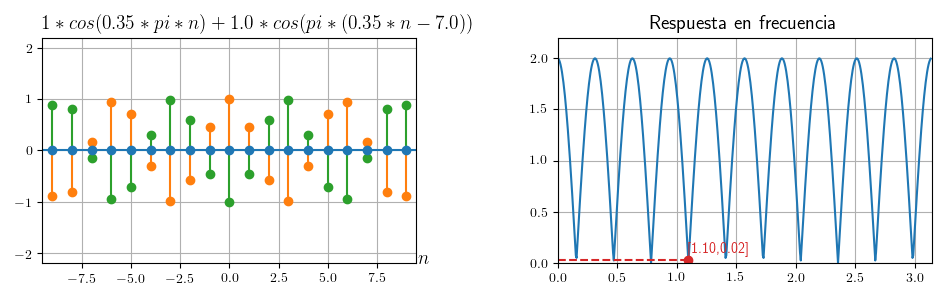

In [35]:
# Interferencia de una sinusoide y su retardo
alphaSlider = widgets.FloatSlider(value=1, min=0, max=1, step=0.1, description=r'\(\alpha\):')
tauSlider = widgets.IntSlider(value=20, min=0, max=20, step=1, description=r'\( \tau\):')
freqSlider1.min = 0
freqSlider1.max = 0.99
freqSlider1.step = 0.01
slHBox4 = widgets.HBox([envCheck1, freqSlider1, alphaSlider, tauSlider])

s1Button = widgets.ToggleButton(value=True, description=r'\(x[n]\)', disabled=False, button_style='info')
s2Button = widgets.ToggleButton(value=True, description=r'\(\alpha*x[n-tau]\)', disabled=False, button_style='info')
sBox = widgets.HBox([s1Button, s2Button])

plt.figure(figsize=(9.5, 3), tight_layout=True)

plt.subplot(121)
npts = 10
ns = np.arange(-npts, npts+1)
pl1 = plt.stem(ns, np.zeros(2*npts+1), linefmt='C1-', basefmt='None', markerfmt='oC1')
pl2 = plt.stem(ns, np.zeros(2*npts+1), linefmt='C2-', basefmt='None', markerfmt='oC2')
pls = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
ne = np.arange(-npts-1, npts+1, 0.01)
ple1 = plt.plot(ne, np.zeros_like(ne), 'C1', lw=0.8)
ple1[0].set_visible(False)
ple2 = plt.plot(ne, np.zeros_like(ne), 'C2', lw=0.8)
ple2[0].set_visible(False)
ples = plt.plot(ne, np.zeros_like(ne), 'C0', lw=0.8)
ples[0].set_visible(False)
plt.axis([-npts+0.5, npts-0.5, -2.2, 2.2])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)

plt.subplot(122)
N = 512
nk = np.pi*np.arange(0, N)/N
plsp = plt.plot(nk, np.zeros_like(nk), 'C0-')
plsp1 = plt.plot([0, 0, 0], [0, 0, 0], '--C3')
plsp2 = plt.plot(0, 0, 'oC3')
plsp3 = plt.text(0.0, 0.0, '[{0[0]:.2f},{0[1]:.2f}]'.format([0, 0]), size=10, color='C3')

plt.axis([0, np.pi, 0, 2.2])
plt.grid(True)
plt.title('Respuesta en frecuencia', size=14)

def s4():
    npts = 5
    tau = tauSlider.value
    alpha = alphaSlider.value
    omega = freqSlider1.value
    s1 = ds.Sinusoid(1, omega * sp.S.Pi)
    s2 = alpha * (s1 >> tau)
    s = s1 + s2

    pl1[0].set_visible(s1Button.value)
    ple1[0].set_visible(s1Button.value and envCheck1.value)
    for k in range(len(ns)):
        pl1[1][k].set_visible(s1Button.value)
    if s1Button.value:
        y1 = s1[ns]
        pl1[0].set_ydata(y1)
        for k in range(len(ns)):
            pl1[1][k].set_ydata([0, y1[k]])
        if envCheck1.value:
            ple1[0].set_ydata(s1.eval(ne, True))

    pl2[0].set_visible(s2Button.value)
    ple2[0].set_visible(s2Button.value and envCheck1.value)
    for k in range(len(ns)):
        pl2[1][k].set_visible(s2Button.value)
    if s2Button.value:
        y2 = s2[ns]
        pl2[0].set_ydata(y2)
        for k in range(len(ns)):
            pl2[1][k].set_ydata([0, y2[k]])
        if envCheck1.value:
            ple2[0].set_ydata(s2.eval(ne, True))

    ys = s[ns]
    pls[0].set_ydata(ys)
    for k in range(len(ns)):
        pls[1][k].set_ydata([0, ys[k]])
    
    ples[0].set_visible(envCheck1.value)
    if envCheck1.value:
        ples[0].set_ydata(s.eval(ne, True))

    plt.subplot(121)
    plt.title(r'${0} + {1}$'.format(sp.latex(s1), sp.latex(s2)), loc='left', size=14)      
    
    # espectro
    if tau == 0:
        B = 1 + alpha
    else:
        B = np.r_[1, [0]*(tau-1), alpha]
    om, H = sg.freqz(B, [1], N)
    H = np.abs(H)
    plsp[0].set_ydata(H)
    ompi = omega * np.pi
    plsp1[0].set_data([0, ompi, ompi], [H[int(N*omega)], H[int(N*omega)], 0])
    pt = (ompi, H[int(N*omega)])
    plsp2[0].set_data(pt)
    plsp3.set_position((pt[0] + (0.00 if ompi < 2.6 else -0.45), pt[1] + 0.07))
    plsp3.set_text('[{0[0]:.2f},{0[1]:.2f}]'.format(pt))
    
def s4change(change):
    s4()

for w in slHBox4.children:
    w.unobserve_all()
    w.observe(s4change, names='value')
for w in sBox.children:
    w.unobserve_all()
    w.observe(s4change, names='value')

s4()
display(widgets.VBox([slHBox4, sBox]))

In [34]:
from ipywidgets import IntSlider, Label

In [14]:
IntSlider(description=r'\(\int_0^t f\)')